#Iris classification model

Attribut information:
                    1- Sepal width cm
                    2- Sepal height cm
                    3- Petal width cm
                    4- Petal height cm
                    5- class: Iris Setosa - Iris Versicolour - Iris Virginica.

# Import modules

In [36]:
import numpy as np
import pandas as pd
import os ##to handle some files
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [37]:
df = pd.read_csv('Iris.csv')

In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#delete the Id column (unecessary column)
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
#desplay some stats about the dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [41]:
#display basic infor about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [42]:
#displa number of samples on each classe
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Processing the dataset

In [43]:
#check for Null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

<Axes: >

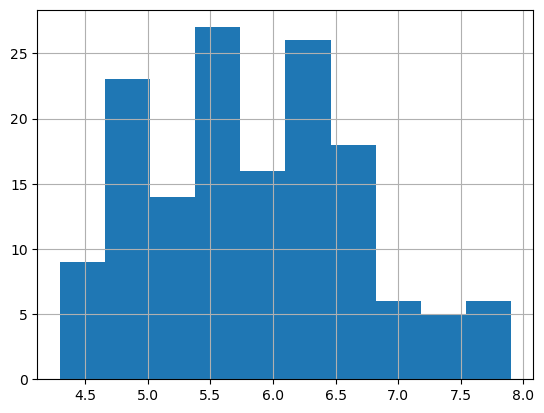

In [44]:
#Histograms
df['SepalLengthCm'].hist()

<Axes: >

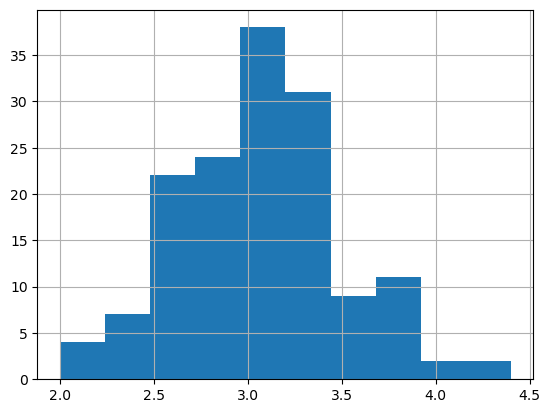

In [45]:
df['SepalWidthCm'].hist()

<Axes: >

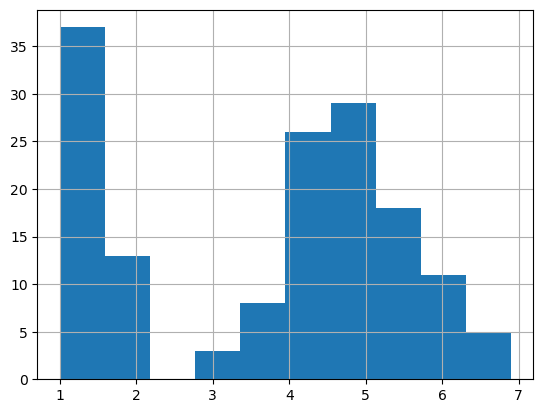

In [46]:
df['PetalLengthCm'].hist()

<Axes: >

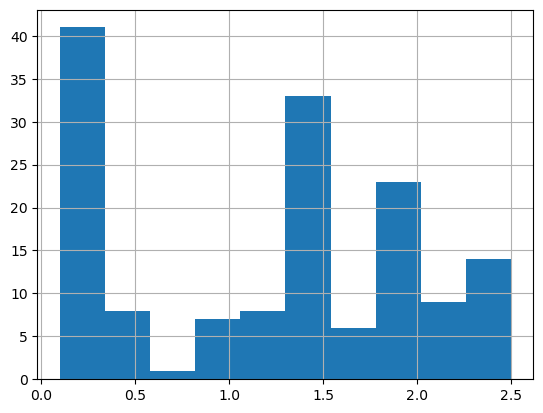

In [47]:
df['PetalWidthCm'].hist()

In [48]:
#scaterplot
colors = ['red','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

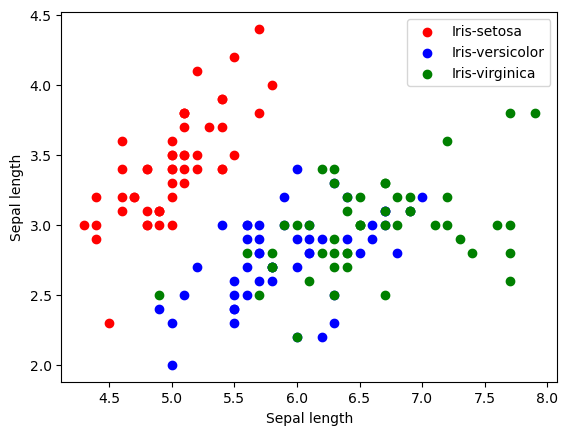

In [49]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Sepal length')
plt.legend()

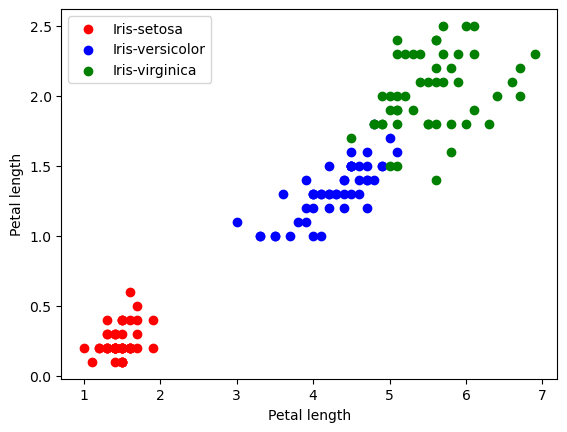

In [50]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal length')
plt.ylabel('Petal length')
plt.legend()

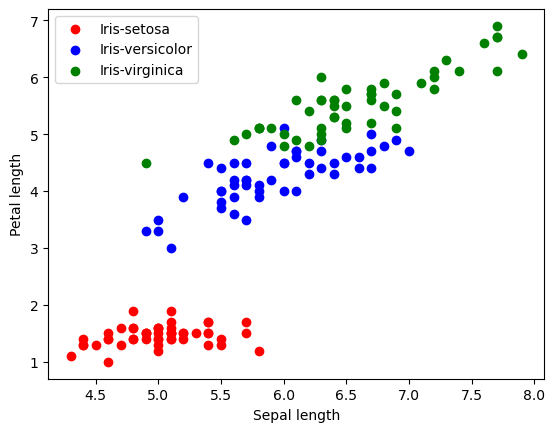

In [51]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()

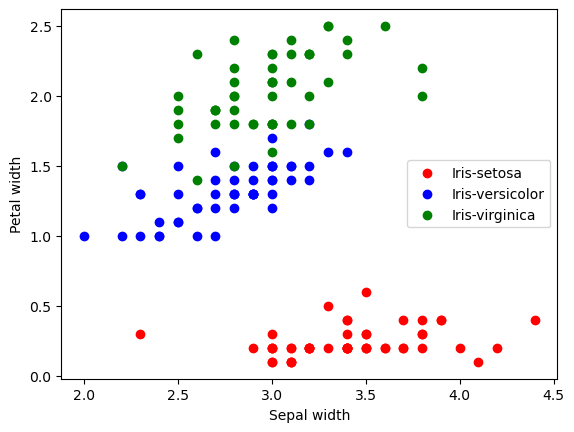

In [52]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()

# Correlation matrix

In [53]:
df.corr()

C:\Users\GSI Bedjaoui\AppData\Local\Temp\ipykernel_13848\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\GSI Bedjaoui\AppData\Local\Temp\ipykernel_13848\1511553799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

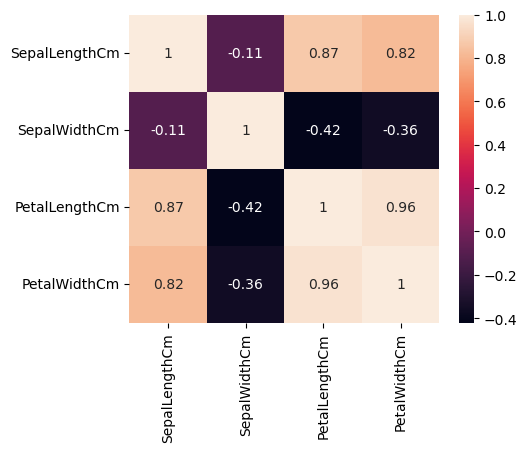

In [54]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

#  Label Encoder

In [55]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

In [56]:
# df['Species'] = le.fit_transform(df['Species'])

In [57]:
# df.head()

# Model training

In [58]:
from sklearn.model_selection import train_test_split
#training and testing 
# train : 70
# test : 30
x = df.drop(columns=['Species'])
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [59]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
#model training
model.fit(x_train, y_train)

LogisticRegression()

In [61]:
#print matrix to get performance
print("Accuracy : ", model.score(x_test, y_test)*100)

Accuracy :  93.33333333333333


In [62]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [63]:
#model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
#print matrix to get performance
print("Accuracy : ", model.score(x_test, y_test)*100)

Accuracy :  97.77777777777777


In [65]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [66]:
#model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
#print matrix to get performance
print("Accuracy : ", model.score(x_test, y_test)*100)

Accuracy :  93.33333333333333


In [68]:
import pickle
filename = 'savedfile.sav'
pickle.dump(model, open(filename, 'wb'))

In [69]:
load_file = pickle.load(open(filename, 'rb'))

In [71]:
load_file.predict([[6.0 , 2.2 , 4.1 , 1.0]])

C:\Users\GSI Bedjaoui\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)